# Follower and Following analyze

We would like to calculte for each user the monition. That Formula came from the Twi-Bot20 article.

According to this formula whoever is closer to zero is probably a bot.

In [1]:
import pandas as pd
import numpy as np
#calcultaion monitin for users to find bot based on the Twi-bot20 research
# reputation(u) = follower(u) / (following(u)+follower(u))

USERS_DATASET_PATH = 'twitter_human_bots_dataset/users_dataset.csv'
users_df = pd.read_csv(USERS_DATASET_PATH, index_col=0)
reputation_set = users_df.get(['id', 'followers_count', 'friends_count'])
reputation_set = reputation_set.rename(columns={"friends_count": "following_count"})

In [2]:
# calcultaion monitin
reputation_value = reputation_set.T.loc['followers_count'] / (reputation_set.T.loc['following_count']+reputation_set.T.loc['followers_count'])
reputation_set.insert(3, "reputation", reputation_value, True)
reputation_set

,id,followers_count,following_count,reputation
0,53779179,102,168,0.377778
1,105916557,60,128,0.319149
2,509788597,599,449,0.571565
3,70601327,116,334,0.257778
4,108999927,74448,18,0.999758
...,...,...,...,...
37433,223764929,257294,196,0.999239
37434,222789645,74666,95,0.998729
37435,80438218,255941,236,0.999079
37436,1296642259,2678042,51,0.999981


In [3]:
sorted_reputation_set = reputation_set.sort_values(by=['reputation']) # sort reputation
sorted_reputation_set.dropna(subset = ["reputation"], inplace=True) # drop NaN
sorted_reputation_set

,id,followers_count,following_count,reputation
29716,365476963,0,8,0.0
33660,832724063445405696,0,2,0.0
16430,784318418862284800,0,21,0.0
13798,849647465989058564,0,23,0.0
14617,862629757,0,47,0.0
...,...,...,...,...
4199,832027121430183936,23,0,1.0
31895,2944686696,6,0,1.0
11076,764449095213780992,27,0,1.0
23004,364005350,7,0,1.0


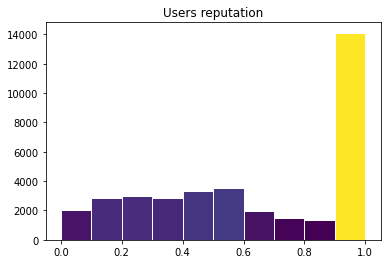

length of each partition  [ 2018.  2857.  2986.  2831.  3308.  3496.  1983.  1467.  1346. 14112.]


In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

n_bins = 10
reputation_valus = list(sorted_reputation_set.get('reputation'))
plt.title('Users reputation')
N, bins, patches = plt.hist(reputation_valus, n_bins, edgecolor='white')
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
# We can also normalize our inputs by the total number of counts
plt.hist(reputation_valus, bins=n_bins, density=True)
plt.show()
print("length of each partition ", N)

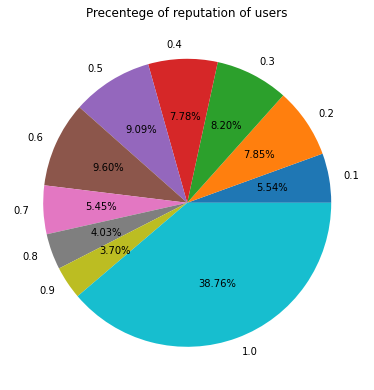

In [5]:
percent = [i/sum(N)*100 for i in N]
mylabels = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
y = np.array(percent)
ax.pie(y, labels = mylabels,autopct='%1.2f%%')
ax.set_title("Precentege of reputation of users")
plt.show()

We can asume that who is 0-0.1 is defently bot, we can compare it between the original DB from kaggle to be sure.

compare size of dataframes:  74876 74876
      account_type                  id  reputation
29716          bot           365476963         0.0
33660          bot  832724063445405696         0.0
16430          bot  784318418862284800         0.0
13798          bot  849647465989058564         0.0
14617          bot           862629757         0.0
...            ...                 ...         ...
37110          bot  877491177876054017         NaN
37116          bot  877405056966037504         NaN
37129          bot  877398270519070720         NaN
37177          bot  877405472747401217         NaN
37349          bot  878072807107600384         NaN

[12425 rows x 3 columns]
bot number:  37275
precentege of bot by reputation: [11.527208894090112, 10.540834238903285, 9.186658864833236, 7.247345983448968, 7.121959374738777, 6.5368218674245595, 3.067792359775976, 2.273677171278108, 1.9727493103736522, 40.52495193513333]
length of each partition  [1379. 1261. 1099.  867.  852.  782.  367.  272.

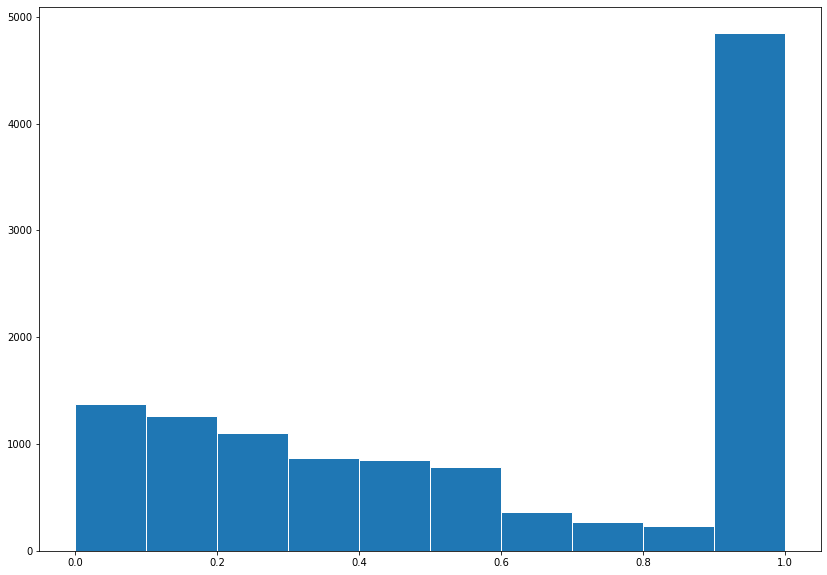

In [47]:
account_type = users_df.get(['account_type', 'id'])
id_reputation_value = reputation_set.get(['reputation', 'id'])
print("compare size of dataframes: ", account_type.size, id_reputation_value.size)
df_all_rows = pd.merge(account_type, id_reputation_value, how='inner', on = 'id')
sorted_df_all_rows = df_all_rows.sort_values(by=['reputation'])
bot_vs_reputation = sorted_df_all_rows.loc[sorted_df_all_rows['account_type']=='bot']
print(bot_vs_reputation)
print("bot number: ", bot_vs_reputation.size)
n_bins = 10
bot_reputation_values = list(bot_vs_reputation.get('reputation'))
N1, bins1, patches1 = plt.hist(bot_reputation_values, n_bins, edgecolor='white')
percenteg1 = [i/sum(N1)*100 for i in N1]
print("precentege of bot by reputation:", percenteg1)
print("length of each partition ", N1)

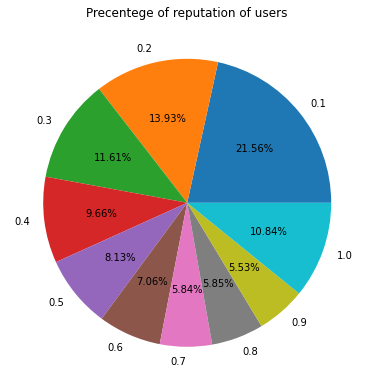

In [7]:
bot_prec_from_each_partition = []
for n1, n2 in zip(N1, N): # 
    bot_prec_from_each_partition.append(n1/n2)
mylabels1 = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]

fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_axes([0,0,1,1])
ax1.axis('equal')
y1 = np.array(bot_prec_from_each_partition)
ax1.pie(y1, labels = mylabels1,autopct='%1.2f%%')
ax1.set_title("Precentege of reputation of users")
plt.show()

Now we are can be pretty sure that we found bots, and the formula is a good criteria at 0-0.1.

## users id network by followers and following

In [8]:
follower_csv_file = r"twitter_human_bots_dataset/followers040522.csv"
follower_data = pd.read_csv(follower_csv_file, encoding='latin-1')

# data overviwe
print(f"Rows Count: {follower_data.shape[0]}")
print(f"Features Count: {follower_data.shape[1]}")

#crate edges list from users following list
users_following_data = follower_data.get(['followed_id','follower_id'])
users_following_data_withoutnone = users_following_data[users_following_data.followed_id != " "].dropna()
users_following_data_withoutnone = users_following_data_withoutnone[users_following_data_withoutnone.follower_id != " "].dropna()
users_following_data_withoutnone.to_csv(r'twitter_human_bots_dataset/edge_list.txt', header=None, index=None, sep=' ', mode='a')

Rows Count: 44559
Features Count: 12


In [9]:
from collections import defaultdict

users_dic = {}
counter_none = 0
for index, row in users_following_data_withoutnone.iterrows():
    try:
        if not isinstance(row['followed_id'], int) and not isinstance(row['follower_id'], int):
            user_id = int(float(row['followed_id']))
            following_id = int(float(row['follower_id']))
            if not users_dic.get(user_id) is None:
                if not following_id in users_dic[user_id]:
                    users_dic[user_id].append(following_id)
            else:
                users_dic[user_id] = []
                users_dic[user_id].append(following_id)
        else:
            counter_none+=1
    except Exception as e:
        print(index, e)
            
print(len(users_dic))
print("number of missing data: ", counter_none)

84
number of missing data:  0


In [27]:
dic_followers_len = {}
for key, values in users_dic.items():
    dic_followers_len[key]= len(values)
print("dic_followers_len: ",len(dic_followers_len))
sorted_dict = {}
sorted_keys = sorted(dic_followers_len, key=dic_followers_len.get,  reverse=True)
for w in sorted_keys:
    sorted_dict[w] = dic_followers_len[w]

print(sorted_dict)

dic_followers_len:  84
{410303609: 999, 2227979517: 998, 120538744: 998, 292920781: 990, 206795782: 947, 121389491: 920, 194490327: 918, 172028587: 888, 16378198: 879, 281473975: 807, 2444454050: 792, 319916258: 786, 28471026: 785, 16967612: 749, 242916135: 622, 62204119: 594, 17685964: 566, 27055023: 565, 509788597: 561, 31139434: 550, 44051445: 542, 155568211: 539, 284265377: 503, 262355899: 499, 1449155815: 493, 2806413827: 484, 99847971: 476, 108999927: 442, 3930997512: 422, 15998107: 411, 488512845: 389, 49031917: 384, 169421357: 374, 2557037323: 363, 138600717: 355, 3237927257: 345, 997629601: 340, 49717874: 311, 66209470: 288, 569581750: 285, 1210485564: 223, 105874636: 200, 1063034450: 190, 2952010610: 190, 8161232: 185, 709541000000000000: 178, 496493810: 172, 36149861: 130, 70601327: 115, 50885229: 114, 955613694: 110, 237947008: 104, 892830000000000000: 102, 1353020900: 100, 53779179: 98, 3262306109: 92, 54135314: 84, 178218286: 81, 33289393: 75, 3245648312: 73, 105916557: 5

In [74]:
import networkx as nx

G = nx.from_pandas_edgelist(users_following_data_withoutnone, 'id', 'follower_id', )

In [66]:
# merge the data base to graph with labels
users_following_data_withoutnone = users_following_data_withoutnone.rename(columns={"followed_id": "id"})
df_all_rows = pd.merge(users_following_data_withoutnone, bot_vs_reputation, how='inner', on = 'id')
df_all_rows['id'] = df_all_rows['id'].astype(np.int64)
df_all_rows['follower_id'] = df_all_rows['follower_id'].astype(np.int64)
print(df_all_rows.dtypes)
df_all_rows

id                int64
follower_id       int64
account_type     object
reputation      float64
dtype: object


,id,follower_id,account_type,reputation
0,53779179,782000000000000000,bot,0.377778
1,53779179,1390000000000000000,bot,0.377778
2,53779179,1470000000000000000,bot,0.377778
3,53779179,1480000000000000000,bot,0.377778
4,53779179,103288329,bot,0.377778
...,...,...,...,...
3967,3237927257,2851246028,bot,0.788235
3968,3237927257,458886051,bot,0.788235
3969,3237927257,2301610448,bot,0.788235
3970,3237927257,486244492,bot,0.788235


In [70]:
G = nx.from_pandas_edgelist(df_all_rows,source='id', target='follower_id')
nx.set_node_attributes(G, df_all_rows['reputation'], "reputation")

# Degree Analysis

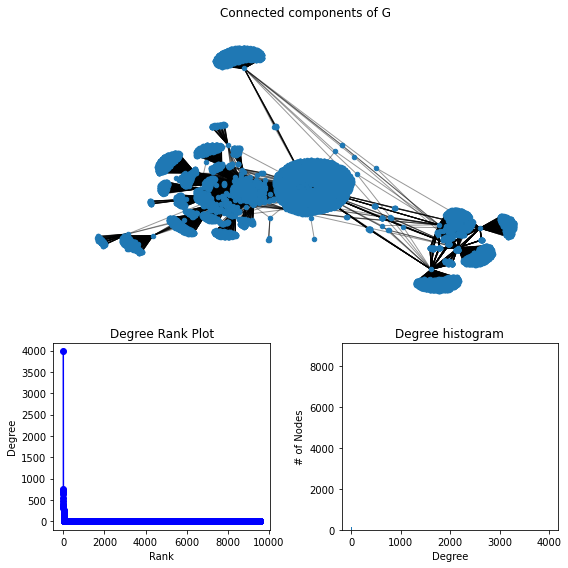

In [45]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html#sphx-glr-auto-examples-drawing-plot-degree-py

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

it's take a lot of time to run only one graph , so we will decrise it only from 10 common or by dgree

In [ ]:
from matplotlib.pylab import rcParams
# https://stackoverflow.com/questions/60919360/make-networkx-plot-look-nice
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
d = dict(G.degree)
nx.draw(G, pos, node_color='lightblue', 
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*300 for k in d])

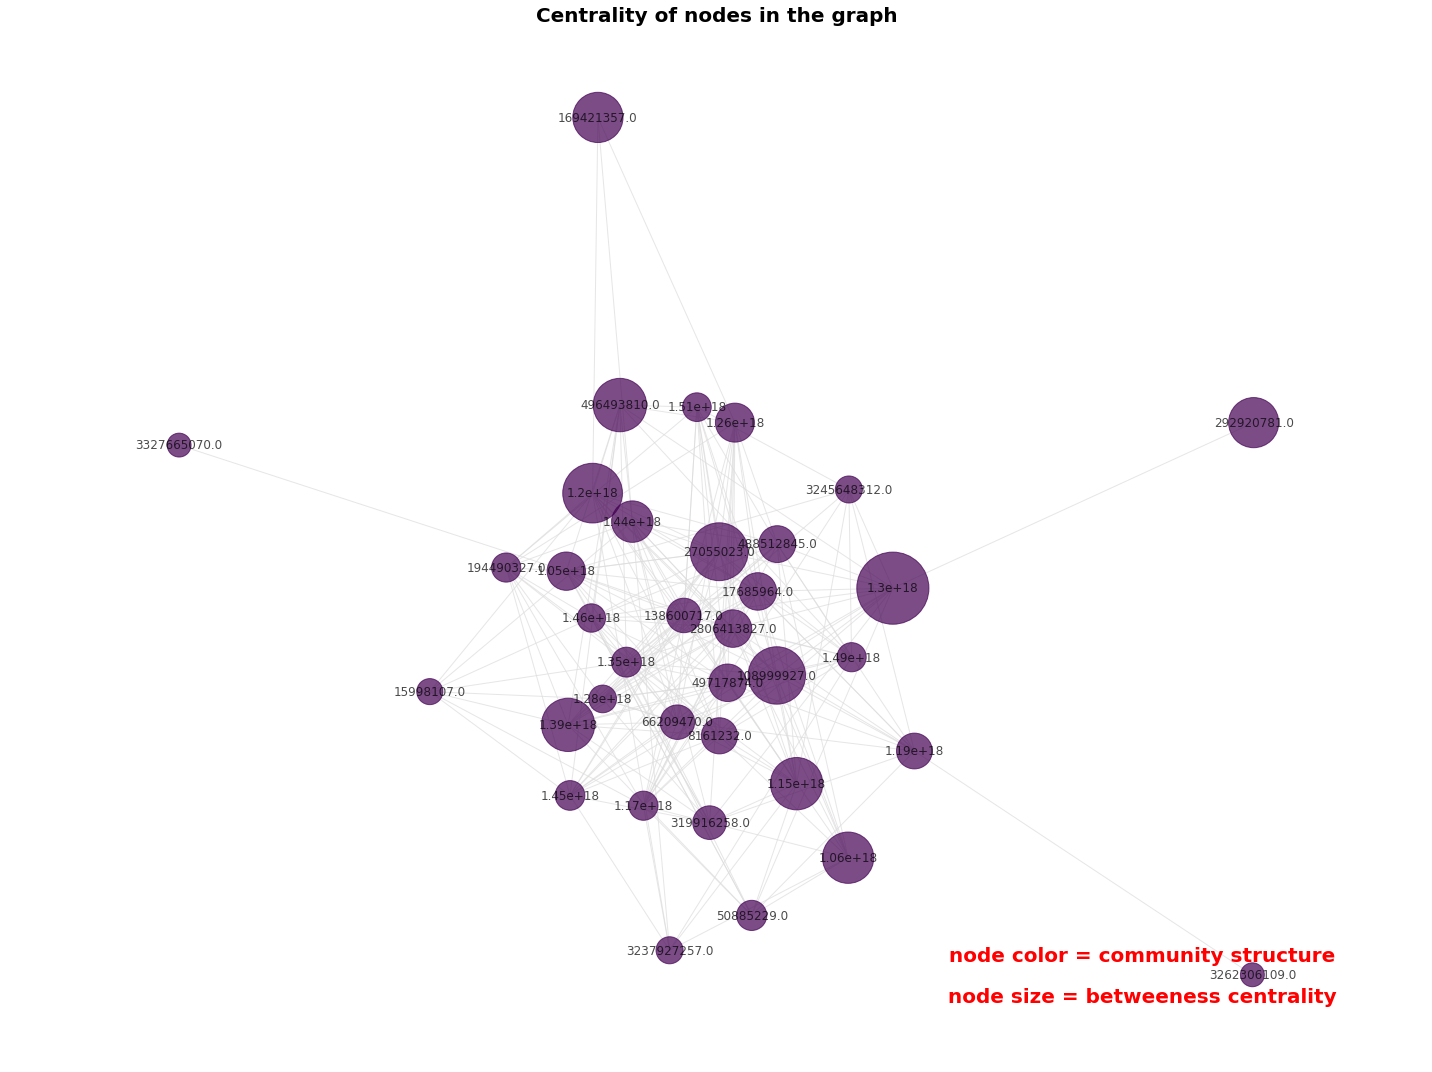

In [75]:
from random import sample
# https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html
# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G1 = G
G1.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G1.degree() if d < 10]
G1.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G1)
largest_component = max(components, key=len)
H = G1.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=True,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.7,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Centrality of nodes in the graph", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [56]:
print("number_connected_component: ", nx.number_connected_components(G))
# degree_centrality = nx.degree_centrality(G)
print("has_bridges: ", nx.has_bridges(G))
bridges = list(nx.bridges(G))

number_connected_component:  10
has_bridges:  True
bridges:  [(53779179.0, 103288329.0), (53779179.0, 3402076510.0), (53779179.0, 532688190.0), (53779179.0, 2769997956.0), (53779179.0, 3304258775.0), (53779179.0, 220717217.0), (53779179.0, 4035230745.0), (53779179.0, 3331954403.0), (53779179.0, 64425077.0), (53779179.0, 46815315.0), (53779179.0, 3308261657.0), (53779179.0, 408844110.0), (53779179.0, 336668416.0), (53779179.0, 522701189.0), (53779179.0, 1253132960.0), (53779179.0, 165787648.0), (53779179.0, 1219082114.0), (53779179.0, 322268233.0), (53779179.0, 3306011373.0), (53779179.0, 3029133196.0), (53779179.0, 215456850.0), (53779179.0, 999812449.0), (53779179.0, 23012948.0), (53779179.0, 69712306.0), (53779179.0, 1716960422.0), (53779179.0, 339259604.0), (53779179.0, 250240194.0), (53779179.0, 263709560.0), (53779179.0, 3352762954.0), (53779179.0, 3361909372.0), (53779179.0, 865613653.0), (53779179.0, 1053259836.0), (53779179.0, 4289875529.0), (53779179.0, 2809477894.0), (5377917

{53779179.0: 0,
 7.82e+17: 0,
 1.39e+18: 0,
 1.47e+18: 0,
 1.48e+18: 0,
 103288329.0: 0,
 1.44e+18: 0,
 3402076510.0: 0,
 1.08e+18: 0,
 1.31e+18: 0,
 1.38e+18: 0,
 7.46e+17: 0,
 1.35e+18: 0,
 9.92e+17: 0,
 1.25e+18: 0,
 1.23e+18: 0,
 532688190.0: 0,
 1.13e+18: 0,
 1.22e+18: 0,
 8.2e+17: 0,
 1.29e+18: 0,
 1.32e+18: 0,
 1.27e+18: 0,
 8.38e+17: 0,
 2769997956.0: 0,
 1.14e+18: 0,
 1.26e+18: 0,
 9.74e+17: 0,
 7.37e+17: 0,
 1.16e+18: 0,
 1.21e+18: 0,
 9.51e+17: 0,
 1.3e+18: 0,
 1.03e+18: 0,
 8.42e+17: 0,
 1.11e+18: 0,
 3304258775.0: 0,
 9.94e+17: 0,
 220717217.0: 0,
 4035230745.0: 0,
 8.7e+17: 0,
 3331954403.0: 0,
 64425077.0: 0,
 46815315.0: 0,
 1.28e+18: 0,
 8.65e+17: 0,
 1.15e+18: 0,
 3308261657.0: 0,
 408844110.0: 0,
 1.09e+18: 0,
 1.19e+18: 0,
 336668416.0: 0,
 7.21e+17: 0,
 1.12e+18: 0,
 1.07e+18: 0,
 522701189.0: 0,
 1253132960.0: 0,
 165787648.0: 0,
 1.24e+18: 0,
 1.18e+18: 0,
 8.09e+17: 0,
 1219082114.0: 0,
 1.02e+18: 0,
 8.64e+17: 0,
 7.18e+17: 0,
 322268233.0: 0,
 7.75e+17: 0,
 33

In [ ]:
# !pip install python-louvain
# from community import community_louvain
# communities =community_louvain.best_partition(G)

In [ ]:
import community as community_louvain
import matplotlib.cm as cm

# # Relabel nodes
# G = nx.relabel_nodes(G, {i: f"node_{i}" for i in G.nodes})

# # Compute partition
# partition = community.best_partition(G)

# # Get a set of the communities
# communities = set(partition.values())

# # Create a dictionary mapping community number to nodes within that community
# communities_dict = {c: [k for k, v in partition.items() if v == c] for c in communities}

# # Filter that dictionary to map community to the node of highest degree within the community
# highest_degree = {k: max(v, key=lambda x: G.degree(x)) for k, v in communities_dict.items()}


#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [25]:
users_following_data_withoutnone

,followed_id,follower_id,follower_id(int),followed_id(int)
0,53779179.0,7.820000e+17,78217,537791790
1,53779179.0,1.390000e+18,13918,537791790
2,53779179.0,1.470000e+18,14718,537791790
3,53779179.0,1.480000e+18,14818,537791790
4,53779179.0,1.032883e+08,1032883290,537791790
...,...,...,...,...
44554,62204119.0,2.123391e+08,2123390900,622041190
44555,62204119.0,1.851208e+08,1851207710,622041190
44556,62204119.0,9.322179e+07,932217900,622041190
44557,62204119.0,1.541112e+07,154111220,622041190
